Name: Khushi Shah

Roll no: B067

Aim: Use Hadamard transform to compress the given image. Change the parameter values to vary the effect of compression.

In [ ]:
#If image does not have much variation in intensity it has many low frequency components and Hadamard transformation is more effective for low frequencies components.

import numpy as np
from skimage import io
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
from scipy.linalg import hadamard

In [ ]:
# f is original image, H is hadamard filter, F is image after hadamard transform
def hada(f,N):
  # N is order of the matrix
  H=hadamard(N) # creates hadamard filter
  F=np.dot(np.dot(H,f),H) # dot() is for dot product i.e matrix multiplication in this case
  return F

#to calculate inverse of hadamard transform
#fdash is inverse of image after hadamard transform
def ihada(F,N):
  H=hadamard(N)
  fdash=np.dot(np.dot(H,F),H)
  fdash=fdash//(N*N)
  return fdash

In [ ]:
img=io.imread('/content/cat (1).png')
img=rgb2gray(img)

In [ ]:
img.shape

(733, 490)

In [ ]:
img[2][3]

0.8711780392156863

In [ ]:
img=255*img

In [ ]:
[rows,cols]=img.shape
N=8
img_hada=np.zeros((rows,cols),dtype=int)
for r in range(rows//N):
  for c in range(cols//N):
    temp=img[r*N:(r+1)*N,c*N:(c+1)*N]
    temph=hada(temp,N)
    temph[2:N,2:N]=0
    img_hada[r*N:(r+1)*N,c*N:(c+1)*N]=temph


In [ ]:
img_ihada=np.zeros((rows,cols),dtype=int)
for r in range(rows//N):
  for c in range(cols//N):
    temp=img_hada[r*N:(r+1)*N,c*N:(c+1)*N]
    tempih=ihada(temp,N)
    img_ihada[r*N:(r+1)*N,c*N:(c+1)*N]=tempih


Text(0.5, 1.0, 'Inverse of Image after Hadamard Transform')

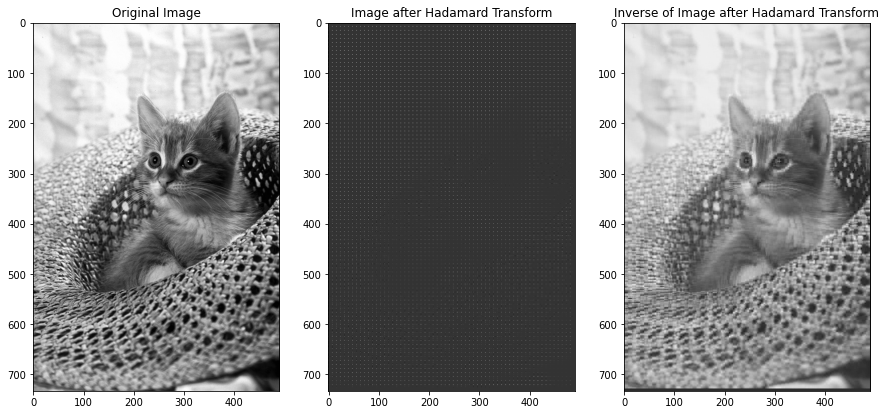

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title ('Original Image')
plt.subplot(1,3,2)
plt.imshow(img_hada, cmap = 'gray')
plt.title ('Image after Hadamard Transform')
plt.subplot(1,3,3)
plt.imshow(img_ihada, cmap = 'gray')
plt.title ('Inverse of Image after Hadamard Transform')

Conclusion: The given image is transformed to Hadamard coefficients using 8x8 size hadamard matrix. To compress the given image some of the hadamard coeffiients are converted to 0. If last 4 rows and 4 cols of 8x8 hadamard coefficients are converted to 0 then there is no considerable difference between original image and inversed image. However if last 6 rows and 6 cols are converted to 0 then the inverse image is pixelated and is different from the original image. This shows that the amount of compression should be changed to optimum value.